#Analysis of Data Scientist Salaries
The following is an analysis of the salaries of 581 data scientists. Sections go through an overview of the data and continue by examining the different attributes that seem to affect salary.

The dataset can be accessed at the following URL: https://richardson.byu.edu/220/ds_salary.csv.

Additionally, descriptions of the data variables can be found here: https://huggingface.co/datasets/hugginglearners/data-science-job-salaries.

##1. General Salary Data
We start by plotting and describing the general shape of the salary data. This initial step sets the foundation for our analysis.

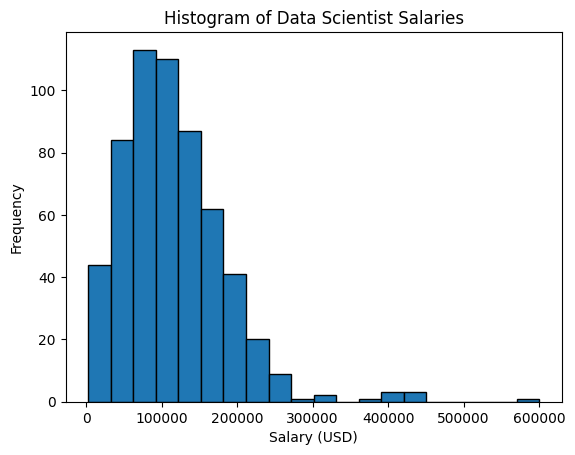

,salary_in_usd
min,2859.000000
25%,66022.000000
50%,105000.000000
75%,150260.000000
max,600000.000000
mean,115601.769363


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

salary_data = pd.read_csv("https://richardson.byu.edu/220/ds_salary.csv")
plt.xlabel("Salary (USD)")
plt.ylabel("Frequency")
plt.title("Histogram of Data Scientist Salaries")
plt.hist(salary_data['salary_in_usd'], bins=20, edgecolor="black")
plt.show()

salary_data['salary_in_usd'].describe().loc[["min", "25%", "50%", "75%", "max", "mean"]]


###Analysis
The data shows a distribution clustered around 100,000 with skew to the right. The minimum value is 2,859 and the maximum value is 600,000. Half of the data is between 66,022 and 150,260. The average value is 115,601.77, a number which is higher than expected due to outliers in the upper range. This means that most data scientist positions pay between 50,000 and 160,000 USD a year, with a few jobs being much higher paid.

##2. Effect of Experience on Salary
Here, we investigate how experience influences data scientist salaries. We create visualizations to illustrate the trends and patterns we find.

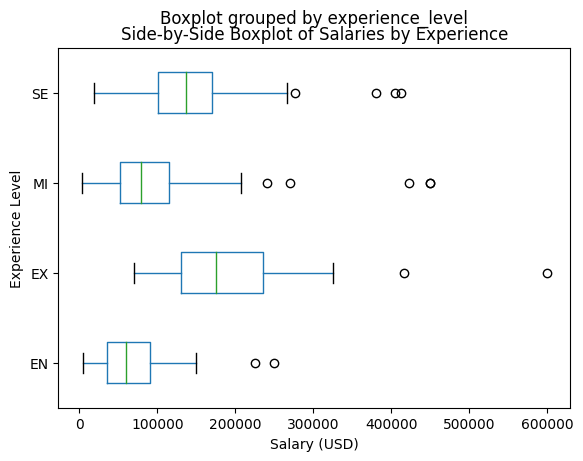

In [ ]:
salary_data.boxplot(column='salary_in_usd', by='experience_level', vert=False, grid=False)
plt.xlabel("Salary (USD)")
plt.ylabel("Experience Level")
plt.title("Side-by-Side Boxplot of Salaries by Experience")
plt.show()

###Analysis
**Relationship between salary and experience level**:
There appears to be a positive relationship between the two. In general as the experience level goes us so does the salary. The mean of each experience level increases as well as the experience increases all the way up to expert, and as suspected it is the ones who are expert that have the highest salary even taking the outliers into account. Another thing that is kind of interesting is that as the experience level goes up so does the overall range of the salary made for that experience level. So entry level experience has the smallest range of salary while expert has the highest range of salary.

##3. Impact of Company Size on Salary
Explore how company size affects data scientist salaries. Generate plots or tables to visualize this relationship.

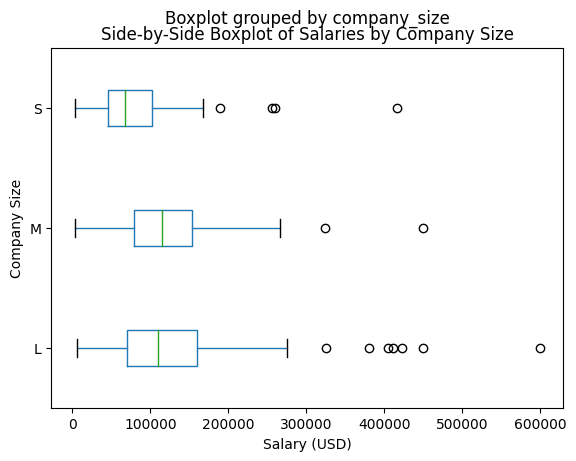

In [ ]:
salary_data.boxplot(column='salary_in_usd', by='company_size', vert=False, grid=False)
plt.xlabel("Salary (USD)")
plt.ylabel("Company Size")
plt.title("Side-by-Side Boxplot of Salaries by Company Size")
plt.show()

###Analysis
**Relationship of salary and company size:** As can be seen in the side-by-side boxplots, the salary of employees in small companies generally have smaller salaries than employees in medium and large companies. While the minimums are similar, the entire inner-quartile range of the salaries of employees in small companies is below the median salary of employees in medium and large companies. Even including outliers, a fully-promoted employee should not expect to make as much money as an employee in a medium or large company.

The salaries between medium and large companies only differ a little bit. The distribution of salaries of employees of large companies is slightly more spread out and reaches just higher than the distribution of medium companies. Large companies have more outliers with greater salaries, but each of the points of the five-number summaries are similar between medium and large companies.

##4. Job Title Analysis
Job titles can vary significantly. For this section, we selected the word "Research" and differentiated between jobs that do or do not contain that word as part of their label.


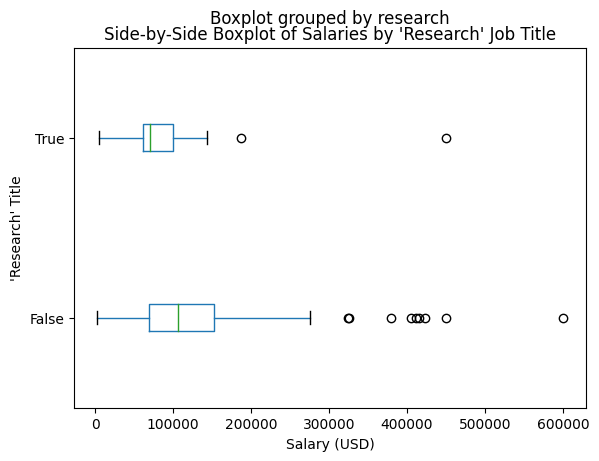

In [ ]:
# salary_mask = salary_data['job_title'].str.contains("Research")
salary_data["research"] = salary_data['job_title'].str.contains("Research")

salary_data.boxplot(column='salary_in_usd', by="research", vert=False, grid=False)
plt.xlabel("Salary (USD)")
plt.ylabel("'Research' Title")
plt.title("Side-by-Side Boxplot of Salaries by 'Research' Job Title")
plt.show()

###Analysis
**Relationship between 'research' title and salary:** As depicted in the boxplots above, data scientists whose titles contain the word 'research' appear to have lower salaries generally than those who do not. While both boxplots have the same minimum salary, the data for those with the 'research' title is more compact (having fewer outliers) and with a smaller range than that of scientists without the title, indicating that the salaries of the former are lower overall. Therefore, the relationship between the 'research' title and salary appears to be a negative one: the greater the salary, the less likely a data scientist is to have 'research' in their title.

##5. Interactions Between Relationships
Investigate potential interactions between the three factors (experience, company size,
and job title). Create a two-way table that displays essential statistics at the intersection of two variables. For instance, construct a table with job titles on the left,
company sizes at the top, and each cell representing the mean salary for each job
title/company size combination

In [ ]:
# A cross table between Experience Level and Company Size
pd.crosstab(salary_data['experience_level'], salary_data['company_size'], values=salary_data['salary_in_usd'], aggfunc='mean').round(2)

company_size,L,M,S
experience_level,,,
EN,78276.04,53376.89,64578.96
EX,236232.50,178241.75,201309.33
MI,103851.44,91423.71,50986.27
SE,154427.12,137815.60,116026.73


In [ ]:
# A cross table between Research Job Title and Experience Level
pd.crosstab(salary_data['research'], salary_data['experience_level'], values=salary_data['salary_in_usd'], aggfunc='mean').round(2)

experience_level,EN,EX,MI,SE
research,,,,
False,64150.75,204206.16,89874.03,141068.92
True,86132.00,NaN,120112.00,88859.40


In [ ]:
# A cross table between Company Size and Research Job Title
pd.crosstab(salary_data['company_size'], salary_data['research'], values=salary_data['salary_in_usd'], aggfunc='mean').round(2)

research,False,True
company_size,,
L,127995.72,96465.0
M,118008.16,145467.0
S,80513.86,53369.0


###Analysis
####Experience Level and Company Size
It appears that Small companies pay Experts at a higher average than Medium companies do. The same can be seen with Entry level jobs.
####Research Job Title and Experience Level
While the word "Research" appears to have a negative relationship to Salary for Expert level positions, for Entry and Middle level positions it appears to have a positive relaitionship with Salary.
####Company Size and Research Job Title
While the word "Research" appears to have a negative relationship to Salary for Large and Small companies, it has a positive relationship with Salary for Medium companies.

##6. Conclusion

###Significant Relationships


*   small campanies pay experts on average more than medium companies.
*   Reseach jobs in general seem to make less money than overall data analysis jobs
*   The employees who work at small companies tend to make less money
*   In general the workers with more experience make more
*   Research jobs also make more in medium sized companies

